In [10]:
from halotools.mock_observables import return_xyz_formatted_array, rp_pi_tpcf_jackknife, s_mu_tpcf, tpcf_multipole
import numpy as np

In [9]:
a=np.loadtxt('/home/dyt/analysis_data/emulator_1100box_planck/emulator_1100box_planck_00-0/z0.7/zheng07-cross_2-xi_0.txt')
a.shape
from glob import glob
temp = '/home/dyt/analysis_data/emulator_1100box_planck/emulator_1100box_planck_00-0/z0.7/zheng07-cross_*-xi_0.txt'
getglob = glob(temp)
xi_list = []
getglob
xi_list = xi_list + getglob
xi_list

['/home/dyt/analysis_data/emulator_1100box_planck/emulator_1100box_planck_00-0/z0.7/zheng07-cross_2-xi_0.txt',
 '/home/dyt/analysis_data/emulator_1100box_planck/emulator_1100box_planck_00-0/z0.7/zheng07-cross_7-xi_0.txt',
 '/home/dyt/analysis_data/emulator_1100box_planck/emulator_1100box_planck_00-0/z0.7/zheng07-cross_6-xi_0.txt',
 '/home/dyt/analysis_data/emulator_1100box_planck/emulator_1100box_planck_00-0/z0.7/zheng07-cross_4-xi_0.txt',
 '/home/dyt/analysis_data/emulator_1100box_planck/emulator_1100box_planck_00-0/z0.7/zheng07-cross_5-xi_0.txt',
 '/home/dyt/analysis_data/emulator_1100box_planck/emulator_1100box_planck_00-0/z0.7/zheng07-cross_3-xi_0.txt',
 '/home/dyt/analysis_data/emulator_1100box_planck/emulator_1100box_planck_00-0/z0.7/zheng07-cross_1-xi_0.txt',
 '/home/dyt/analysis_data/emulator_1100box_planck/emulator_1100box_planck_00-0/z0.7/zheng07-cross_0-xi_0.txt']

In [4]:
Npts = 200
Lbox = 100
x = np.random.uniform(0, Lbox, Npts)
y = np.random.uniform(0, Lbox, Npts)
z = np.random.uniform(0, Lbox, Npts)
coords = np.vstack((x,y,z)).T
Nran = Npts*50
xran = np.random.uniform(0, Lbox, Nran)
yran = np.random.uniform(0, Lbox, Nran)
zran = np.random.uniform(0, Lbox, Nran)
randoms = np.vstack((xran,yran,zran)).T
rbins = np.logspace(0.5, 1.5, 12)
pbins = np.logspace(0.5, 1.5, 8)
xi, xi_cov = rp_pi_tpcf_jackknife(coords, randoms, rbins, pbins, Nsub=3, period=Lbox, num_threads = 10)  

In [2]:
xi.shape

(11, 7)

In [3]:
xi_cov.shape

(77, 77)

In [11]:
%%time
import Halotools as ht # this is the Halotools for Abacus which imports catalogues in a unified format, not astropy.halotools
import numpy as np
import os
from halotools.mock_observables import rp_pi_tpcf_jackknife
from halotools.sim_manager import FakeSim
# from abacus_baofit import baofit_data
# catalogue parameters
sim_name_prefix = 'emulator_1100box_planck'
cosmologies = [0] # 'all'
redshifts = [0.700] #'all'
products_dir = r'/mnt/gosling2/bigsim_products/emulator_1100box_planck_products/'
phases =  [0] # list(range(16)) # 'all'
halo_type = 'Rockstar'
cats = ht.make_catalogs(sim_name = sim_name_prefix, cosmologies = cosmologies, redshifts = redshifts, products_dir = products_dir, phases = phases, halo_type = halo_type,
                        load_halo_ptcl_catalog = False, # this loads subsamples, does not work
                        load_ptcl_catalog = False, # this loads uniform subsamples, not implemented
                        load_pids = 'auto')
# --
# debugging with fake sims
# cats = [[[FakeSim(), FakeSim()],[FakeSim(), FakeSim()]],[[FakeSim(), FakeSim()],[FakeSim(), FakeSim()]]]
# --
# calculate 2pcf, xi as a function of rp (radial bins perpendicular to the LOS) and pi (radial bins parallel to the LOS) in redshift-space
# xi_cats, xi_cov_cats = baofit_data(cats, sim_name_prefix, n_rp_bins = 8, n_pi_bins = 12, num_threads = 10)

Importing catalogue: /mnt/gosling2/bigsim_products/emulator_1100box_planck_products/emulator_1100box_planck_00-0_products/emulator_1100box_planck_00-0_rockstar_halos/z0.700
CPU times: user 9.12 s, sys: 22.1 s, total: 31.2 s
Wall time: 41.1 s


In [12]:
cat = cats[0][0][0] # [redshift][cosmology][phase]
dir(cat)

['BoxSize',
 'Growth',
 'Growth_on_a',
 'HubbleNow',
 'InitialRedshift',
 'Lbox',
 'NP',
 'OmegaNow_DE',
 'OmegaNow_K',
 'OmegaNow_m',
 'ParticleMassHMsun',
 'Redshift',
 'SimName',
 'SofteningLength',
 'SofteningType',
 'ZD_Seed',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_parse_constructor_kwargs',
 '_passively_bind_ptcl_table',
 '_test_halo_table_dict',
 '_test_metadata_dict',
 'add_halocat_to_cache',
 'cosmology',
 'f_growth',
 'halo_finder_cfg',
 'halo_table',
 'header',
 'ns',
 'particle_mass',
 'redshift',
 'sigma_8',
 'w']

In [14]:
cat.simname

AttributeError: 'AbacusHaloCatalog' object has no attribute 'simname'

In [28]:
from glob import glob
paths = glob('/home/dyt/analysis_data/emulator_1100box_planck/emulator_1100box_planck_00-0/z0.7/*cross*xi_[02].txt')
sorted(paths)
path0 = paths[0]
path2 = paths[1]
xi_0 = np.loadtxt(path0)
xi_2 = np.loadtxt(path2)
np.hstack([xi_0, xi_2]).shape

(50,)

In [14]:
len(cat.halo_table)

8104547

In [20]:
cat.halo_table[cat.halo_table["halo_num_p"]>100]

halo_upid,halo_A2 [3],halo_r,halo_num_child_particles,halo_corevel [3],halo_energy,halo_min_vel_err,halo_min_bulkvel_err,halo_p_start,halo_desc,halo_rvmax,halo_vmax_r,halo_min_pos_err,halo_m_pe_d,halo_b_to_a2,halo_m_pe_b,halo_child_r,halo_mgrav,halo_c_to_a2,halo_A [3],halo_alt_m [4],halo_num_p,halo_subsamp_start,halo_N_SO,halo_spin,halo_subsamp_len,halo_b_to_a,halo_x,halo_z,halo_m_SO,halo_c_to_a,halo_n_core,halo_alt_N [4],halo_m,halo_bullock_spin,halo_vrms,halo_Voff,halo_bulkvel [3],halo_alt_N_SO [4],halo_vmax,halo_alt_m_SO [4],halo_y,halo_Xoff,halo_id,halo_vx,halo_vy,halo_vz,halo_flags,halo_klypin_rs,halo_rs,halo_kin_to_pot,halo_N,halo_J [3]
int64,float32,float32,int64,float32,float32,float32,float32,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,uint64,int32,float32,uint32,float32,float32,float32,float32,float32,int64,int32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,int64,float32,float32,float32,int64,float32,float32,float32,int32,float32
508299,20.3391 .. 11.9077,299.046,104,1458.52 .. 619.005,-3.48052e+16,1151.66,1151.66,145869511,0,246.553,0.319234,0.000571188,1.90383e+12,0.325712,2.00222e+12,0.372065,2.0981e+12,0.0223235,42.1445 .. 59.1897,2.13695e+12 .. 0.0,104,7,71,0.0774913,10,0.842055,355.974,211.149,2.75861e+12,0.452499,54,55 .. 0,2.21466e+12,0.0963587,227.933,5.84116,1458.52 .. 619.005,74 .. 0,240.029,2.87517e+12 .. 0.0,104.618,36.5701,508295,1458.52,1657.59,619.005,9,60.7726,60.7726,0.606067,57,9.06265e+12 .. 4.82758e+12
-1,46.6495 .. -28.7001,335.129,160,1346.14 .. 472.897,-6.74883e+16,950.56,950.56,145869746,0,151.581,0.353429,0.000482688,2.56434e+12,0.439853,2.85124e+12,0.429517,2.95288e+12,0.0841713,55.7719 .. -34.4155,3.03059e+12 .. 1.94269e+11,160,24,78,0.0418677,13,0.6225,355.197,210.92,3.03059e+12,0.326091,74,78 .. 5,2.95288e+12,0.0497059,258.05,1.92841e-05,1346.14 .. 472.897,80 .. 5,270.361,3.1083e+12 .. 1.94269e+11,107.788,9.229,508298,1346.14,650.641,472.897,9,65.645,65.645,0.587542,76,-4.9151e+12 .. -9.13206e+12
-1,-71.3085 .. -2.30234,1465.94,35064,339.285 .. 666.147,-8.13155e+19,3442.42,243.749,145869919,0,1455.85,1.35056,8.54496e-05,3.3286e+14,0.448527,3.70244e+14,2.58957,2.47148e+14,0.263906,-91.0564 .. -16.6907,2.58183e+14 .. 4.47595e+13,5681,37,6398,0.0206852,590,0.510257,356.447,211.345,2.48586e+14,0.32783,378,6645 .. 1152,2.47148e+14,0.0283123,1244.44,113.886,373.73 .. 599.635,6705 .. 1152,1110.8,2.60514e+14 .. 4.47595e+13,105.563,59.229,508299,339.285,509.65,666.147,9,631.676,483.137,0.702867,6361,4.27177e+15 .. 7.07766e+15
508299,-10.8597 .. 14.1863,374.435,187,151.041 .. 543.946,-1.13847e+17,981.682,971.32,145875719,0,235.395,0.412928,0.000349778,3.186e+12,0.762417,4.03982e+12,0.452433,4.11849e+12,0.411768,-33.9027 .. 0.921719,4.23505e+12 .. 3.88537e+11,187,631,196,0.0500295,18,0.734535,356.228,212.095,7.61533e+12,0.609505,98,109 .. 10,4.35162e+12,0.0603419,303.622,5.74197,146.736 .. 553.077,196 .. 12,314.589,7.61533e+12 .. 4.66244e+11,104.367,30.9728,508302,151.041,1364.66,543.946,9,56.7287,59.6228,0.625574,112,-9.67502e+12 .. -1.95509e+13
-1,95.6549 .. -50.1312,1270.91,8716,-230.458 .. -181.219,-2.6239e+19,4440.88,309.195,145876673,0,817.021,1.08106,7.45137e-05,1.42632e+14,0.817961,1.5125e+14,1.62822,1.61049e+14,0.657495,130.138 .. 20.5131,1.63108e+14 .. 3.77269e+13,2858,672,4312,0.030075,274,0.810432,358.228,214.316,1.67537e+14,0.729726,246,4198 .. 971,1.66255e+14,0.0507148,1137.69,514.338,241.228 .. -239.248,4400 .. 971,1040.58,1.70956e+14 .. 3.77269e+13,101.667,76.0256,508310,-230.458,811.964,-181.219,9,225.188,251.367,0.827749,4279,2.01026e+15 .. 7.31626e+15
508310,19.1498 .. -8.66093,340.908,142,1341.83 .. -958.932,-6.36873e+16,931.265,931.265,145880146,0,309.384,0.355384,0.000752434,3.22486e+12,0.326192,2.84714e+12,0.412766,3.1083e+12,0.0443344,-22.5241 .. 71.6218,3.22486e+12 .. 0.0,142,987,102,0.0557405,14,0.734403,357.94,215.047,3.96308e+12,0.493429,84,83 .. 0,3.38027e+12,0.071097,252.637,

In [23]:
cats[1][0][0].header

{'GPUMinCellSinks': 20, 'Growth_on_a': 0.873063057167064, 'CPD': 375, 'ConvolutionCacheSizeMB': 20, 'NumSlabsInsertList': 8, 'HubbleNow': 1.173047896474531, 'MultipoleDirectory': '/dev/shm/lhgarrison//emulator_720box_planck_00-0/read/multipole', 'MachineName': 'gpu64', 'omnuh2': 0.0, 'OutputType': 'TimeSlice', 'Do2LPTVelocityRereading': 0, 'SlabNumber': 0, 'ZD_Pk_scale': 1.0, 'N_eff': 3.04, 'etaK': 2.965702405124697, 'BoxSizeHMpc': 720.0, 'nTimeSlice': 5, 'omch2': 0.1199, 'DeltaRedshift': 0.001655166082228, 'Htime': 0.830174791324856, 'sigma_8': 0.83, 'Redshift': 0.3, 'ZD_Seed': 0, 'ombh2': 0.02222, 'LastHalfEtaKick': 0.0007049359029411839, 'HubbleTimeHGyr': 9.7782, 'etaD': -4.38125205610748, 'w0': -1.0, 'InitialConditionsDirectory': '/rsgrps/pinto/lhgarrison//emulator_720box_planck_00-0/ic', 'ZD_Pk_norm': 8.0, 'ParticleMassHMsun': 10895617983.00702, 'HubbleTimeGyr': 14.537912578055307, 'LightConeOrigins': (-0.5, -0.5, -0.5, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0), 'ICFormat': 'RVZel', 'ZD_k_cut

In [13]:
cat.halo_table.info

<Table length=7629846>
          name            dtype  shape
------------------------ ------- -----
               halo_upid   int64      
                 halo_A2 float32  (3,)
                  halo_r float32      
halo_num_child_particles   int64      
            halo_corevel float32  (3,)
             halo_energy float32      
        halo_min_vel_err float32      
    halo_min_bulkvel_err float32      
            halo_p_start   int64      
               halo_desc   int64      
              halo_rvmax float32      
             halo_vmax_r float32      
        halo_min_pos_err float32      
             halo_m_pe_d float32      
            halo_b_to_a2 float32      
             halo_m_pe_b float32      
            halo_child_r float32      
              halo_mgrav float32      
            halo_c_to_a2 float32      
                  halo_A float32  (3,)
              halo_alt_m float32  (4,)
              halo_num_p   int64      
      halo_subsamp_start  uint64      
  

In [51]:
def baofit_data(catalogue, )x = cat.halo_table['halo_x']
y = cat.halo_table['halo_y']
z = cat.halo_table['halo_z']
pos = return_xyz_formatted_array(x, y, z, period = cat.Lbox)
rp_bins = np.logspace(-1, np.log10(cat.BoxSize/3), 15) # perpendicular bins
pi_bins = np.logspace(-1, np.log10(cat.BoxSize/3), 15) # parallel bins
rp_bin_centres = (rp_bins[1:] + rp_bins[:-1])/2
pi_bin_centres = (pi_bins[1:] + pi_bins[:-1])/2
%time xi = rp_pi_tpcf(pos, rp_bins, pi_bins, period=cat.Lbox, num_threads = 'max')
# save xi as data for baofit
baofit_data = np.column_stack((np.arange(xi.size), xi.flatten(order = 'C')))
np.savetxt(r'/home/dyt/analysis_data/emulator_720box_planck.data', baofit_data, fmt = ['%.0f', '%.30f'], delimiter=' ')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.81 µs


In [52]:
import pickle
with open('/home/dyt/analysis_data/1_xi.pickle', 'wb') as handle:
    pickle.dump(xi, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [1]:
from halotools.sim_manager import FakeSim
from halotools.mock_observables import rp_pi_tpcf
import numpy as np
halocat = FakeSim()
x = halocat.halo_table['halo_x']
y = halocat.halo_table['halo_y']
z = halocat.halo_table['halo_z']
sample1 = np.vstack((x,y,z)).T
rp_bins = np.logspace(-1,1,11) #perp
pi_bins = np.logspace(-1,1,10) #para
rp_bin_centres = (rp_bins[1:] + rp_bins[:-1])/2
pi_bin_centres = (pi_bins[1:] + pi_bins[:-1])/2
%time xi = rp_pi_tpcf(sample1, rp_bins, pi_bins, period=250).T # xi[para, perp]

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 10.2 ms


In [3]:
xi.shape

(9, 10)

In [5]:
np.matrix(np.cov(xi, bias=True)).shape

(9, 9)

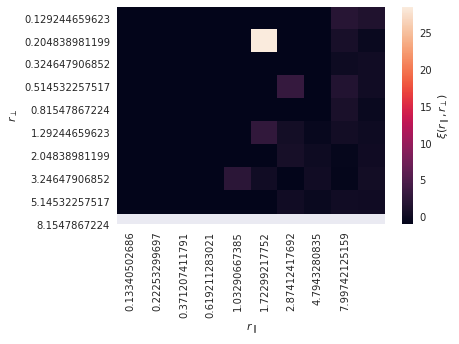

In [56]:
# visualisation of correlation function
import seaborn as sns; sns.set()
%matplotlib inline
ax = sns.heatmap(xi, 
                 xticklabels = pi_bin_centres, yticklabels=rp_bin_centres,
                 cbar_kws = {'label': r'$\xi(r_\parallel, r_\perp)$'})
ax.set_xlabel(r'$r_\parallel$')
ax.set_ylabel(r'$r_\perp$')

In [82]:
# save xi as data for baofit
baofit_data = np.column_stack((np.arange(xi.size), xi.flatten(order = 'C')))
np.savetxt(r'/home/dyt/analysis_data/emulator_720box_planck.data', baofit_data, fmt = ['%.0f', '%.30f'], delimiter=' ')

In [26]:
import pickle
with open('/home/dyt/analysis_data/2.pickle', 'wb') as handle:
    pickle.dump(cat_single, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle
with open('/home/dyt/analysis_data/emulator_1100box_planck_rockstar.pickle', 'wb') as handle:
    pickle.dump(cat, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [16]:
# understand jackkinfe covariance
from halotools.sim_manager import FakeSim
from halotools.mock_observables import tpcf, tpcf_jackknife
import numpy as np
halocat = FakeSim()
x = halocat.halo_table['halo_x']
y = halocat.halo_table['halo_y']
z = halocat.halo_table['halo_z']
sample1 = np.vstack((x,y,z)).T
rbins = np.logspace(-1,1.5,8) #perp
# xi = tpcf(sample1, rbins, period=halocat.Lbox).T # xi[para, perp]
Nran = halocat.num_halos*50
xran = np.random.uniform(0, halocat.Lbox[0], Nran)
yran = np.random.uniform(0, halocat.Lbox[1], Nran)
zran = np.random.uniform(0, halocat.Lbox[2], Nran)
randoms = np.vstack((xran,yran,zran)).T
%time  xi, xi_cov = tpcf_jackknife(sample1, randoms, rbins, Nsub=3, period=halocat.Lbox)

CPU times: user 19 s, sys: 4 ms, total: 19 s
Wall time: 19 s


(7, 7)

In [26]:
cov = np.matrix(np.cov(xi.T, bias=True))*(64-1)

In [30]:
cov.shape

(1, 1)

In [14]:
from halotools.mock_observables import cuboid_subvolume_labels
Nsub = [4,4,4]
labels, N_sub_vol = cuboid_subvolume_labels(sample1, Nsub, halocat.Lbox)
N_sub_vol

64

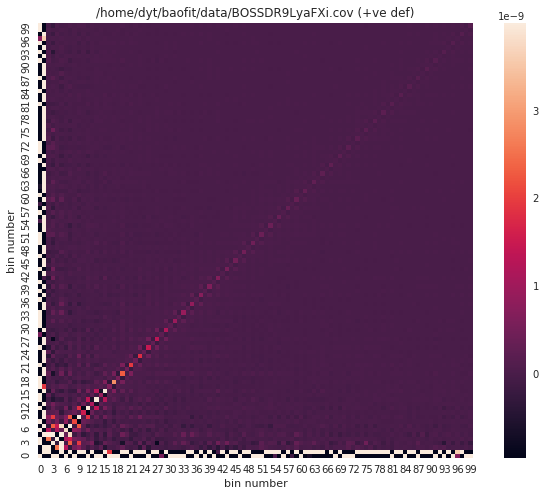

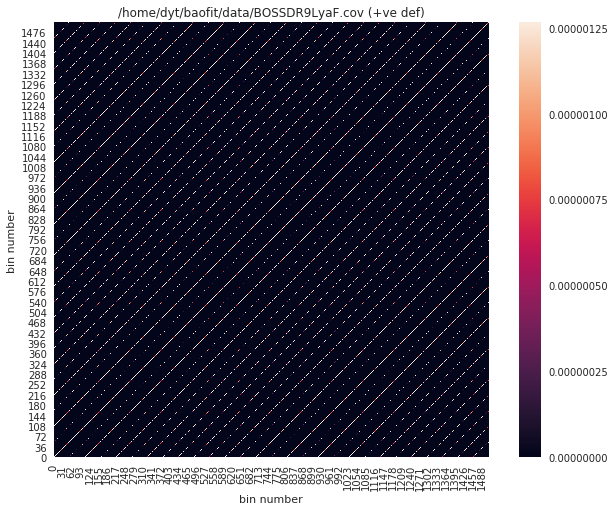

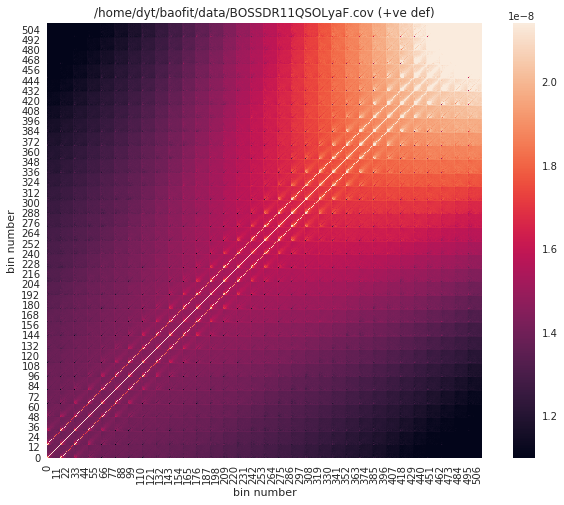

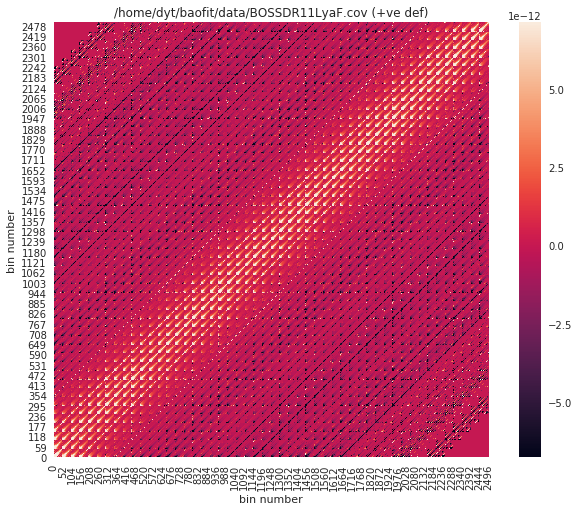

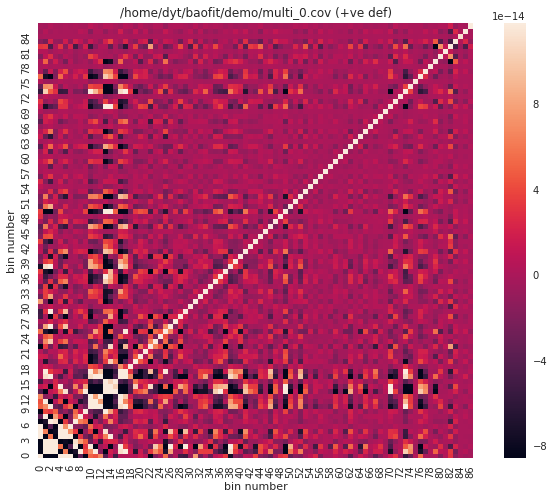

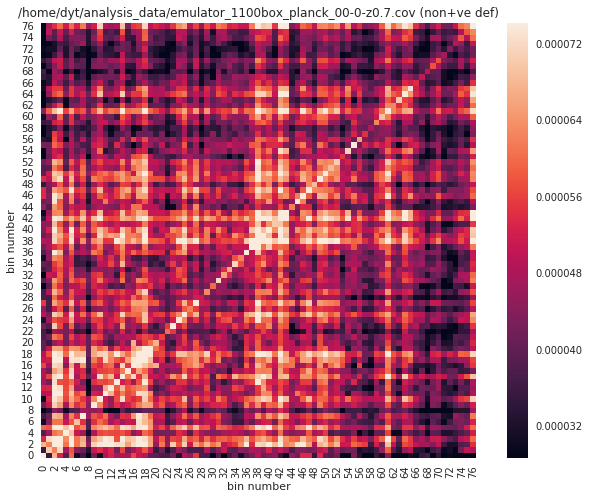

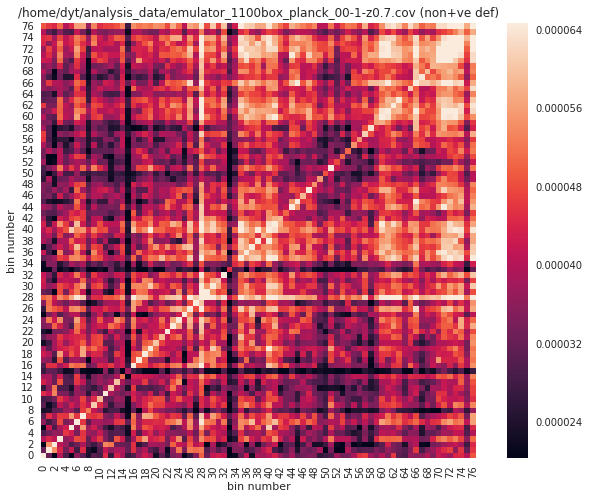

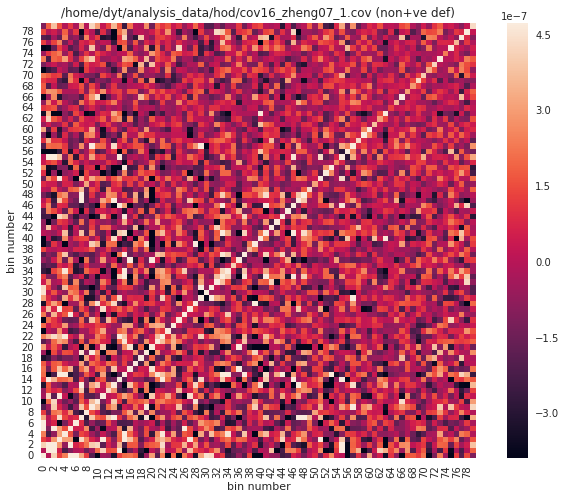

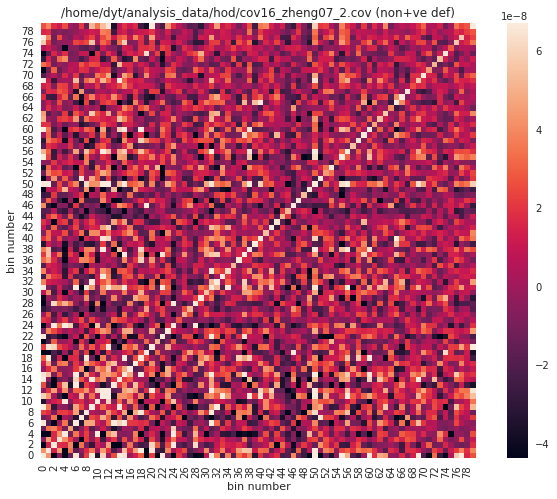

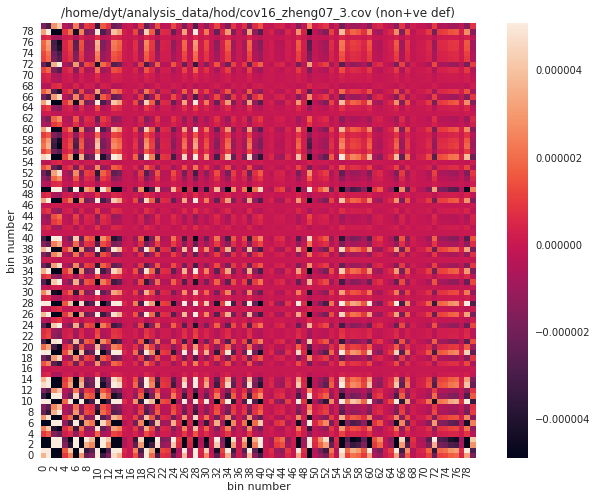

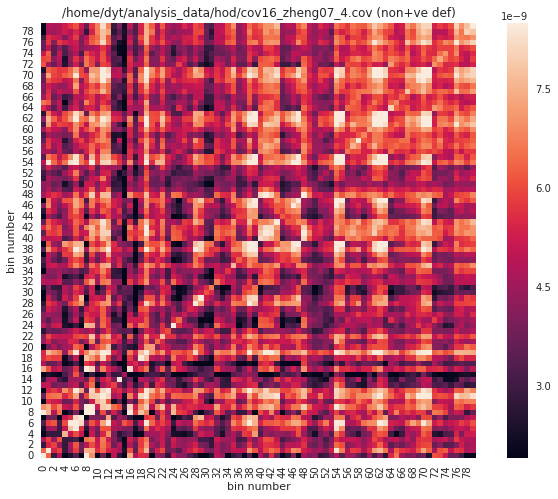

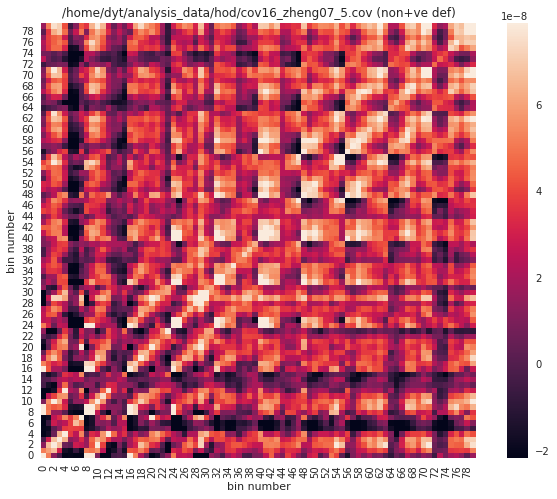

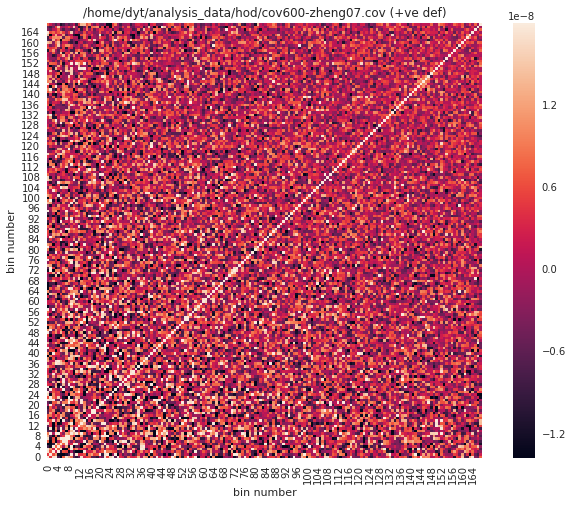

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
plt.rcParams["figure.figsize"] = (11,8)
filelist = [r'/home/dyt/baofit/data/BOSSDR9LyaFXi.cov',
            r'/home/dyt/baofit/data/BOSSDR9LyaF.cov',
            r'/home/dyt/baofit/data/BOSSDR11QSOLyaF.cov',
            r'/home/dyt/baofit/data/BOSSDR11LyaF.cov',
            r'/home/dyt/baofit/demo/multi_0.cov',
            r'/home/dyt/analysis_data/emulator_1100box_planck_00-0-z0.7.cov',
            r'/home/dyt/analysis_data/emulator_1100box_planck_00-1-z0.7.cov',
            r'/home/dyt/analysis_data/hod/cov16_zheng07_1.cov',
            r'/home/dyt/analysis_data/hod/cov16_zheng07_2.cov',
            r'/home/dyt/analysis_data/hod/cov16_zheng07_3.cov',
            r'/home/dyt/analysis_data/hod/cov16_zheng07_4.cov',
            r'/home/dyt/analysis_data/hod/cov16_zheng07_5.cov',
            r'/home/dyt/analysis_data/hod/cov600-zheng07.cov']
for j, file in enumerate(filelist):
    covfile=np.loadtxt(file)
    # r'/home/dyt/analysis_data/hod/emulator_1100box_planck_00--z0.7.cov'
    i1 = covfile[:,0].astype(np.int)
    i2 = covfile[:,1].astype(np.int)
    value = covfile[:,2]
    N = np.max(i1)+1
    cov = np.zeros((N, N))
    for i in range(value.size): 
        cov[i1[i], i2[i]]=value[i] 
        cov[i2[i], i1[i]]=value[i] 
    try: 
        np.linalg.cholesky(cov)
        title = file + ' (+ve def)'
    except:
        title = file + ' (non+ve def)'
    # visualisation of correlation function
    # fig = plt.figure(figsize = (10,10))
    ax = sns.heatmap(cov, robust=True, square=True)
    ax.set_xlabel(r'bin number')
    ax.set_ylabel(r'bin number')
    ax.set_title(title)
    ax.invert_yaxis()
    plt.show()

In [15]:
Npts = 1000
Lbox = 250.
x = np.random.uniform(0, Lbox, Npts)
y = np.random.uniform(0, Lbox, Npts)
z = np.random.uniform(0, Lbox, Npts)
sample1 = np.vstack((x,y,z)).T
x = np.random.uniform(0, Lbox, Npts)
y = np.random.uniform(0, Lbox, Npts)
z = np.random.uniform(0, Lbox, Npts)
sample2 = np.vstack((x,y,z)).T
from halotools.mock_observables import s_mu_tpcf
s_bins  = np.linspace(0.01, 25, 12)
mu_bins = np.linspace(0, 1, 5)
xi_s_mu = s_mu_tpcf(sample1, s_bins, mu_bins, sample2 = sample2, do_auto=False, do_cross=True, period=Lbox)
xi_2 = tpcf_multipole(xi_s_mu, mu_bins, order=2)

In [18]:
txtfmt = '%.30e'
np.savetxt('/home/dyt/analysis_data/1.txt', xi_s_mu, fmt = txtfmt)

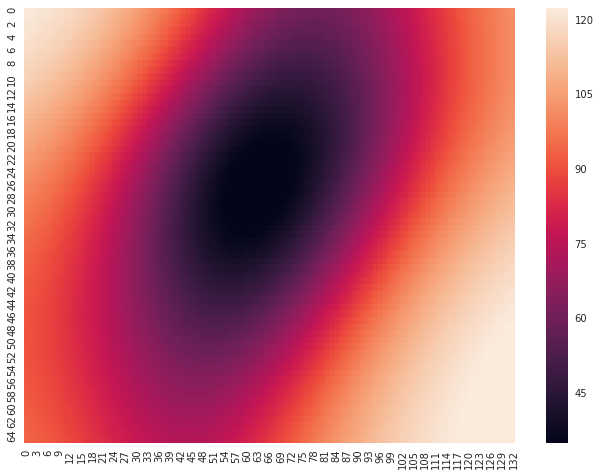

In [25]:
chigrid = np.loadtxt(r'/home/dyt/analysis_data/dr12/2Dbaofits/aratRoss_2016_COMBINEDDR12_zbin3_post_recon_bincent0.dat1covchigrid.dat')
sns.heatmap(chigrid, robust=True)